Aline Freire de Rezende<br>116110571

# Python imports

In [1]:
import numpy as np
import scipy as sp
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
from matplotlib import patheffects
import matplotlib.pyplot as plt
import json
from google.colab import files
import math

## Image upload

In [2]:
uploaded = files.upload()

for fn in uploaded.keys():
  graphicx_data = (cv2.cvtColor(cv2.imread(fn), cv2.COLOR_BGR2GRAY)).astype(float)
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving ipanema.png to ipanema (6).png
User uploaded file "ipanema.png" with length 143925 bytes


## JSON upload

In [3]:
uploaded = files.upload()

for fn in uploaded.keys():
  f = open(fn, )
  graphicx_mod = json.load(f)
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving ex2.json to ex2 (10).json
User uploaded file "ex2.json" with length 55 bytes


# Code (inside test and Screen class)

In [4]:
# FILTROS

# Função do filtro Box
def box(image, bhandler):
  '''
  Aplica o filtro box na imagem

  Args:
    image: matriz de pixels representando a imagem original
    bhandler: determina se o tratamento da borda vai ser cortá-la, ou, para o calculo, extendê-la
  Returns:
    filtered: matriz de pixels filtrada
  '''
  coef = 9

  if bhandler == 'icrop':
    a, b = image.shape
    filtered = np.zeros((a-2,b-2)) 

    for row in range(1,len(image)-1): # ignora a primeira e última linhas e primeira e última colunas (row-1 e col-1)
      for col in range(1, len(image[row])-1):
        filtered[row-1][col-1] = (image[row-1][col-1]+image[row-1][col]+image[row-1][col+1] + image[row][col-1]+image[row][col]+image[row][col+1] + image[row+1][col-1]+image[row+1][col]+image[row+1][col+1])/9


  if bhandler == 'extend':
    filtered = np.zeros(image.shape)

    # Quinas
    filtered[0][0] = (4 * image[0][0] + 2 * image[0][1] + 2 * image[1][0] + image[1][1])/9
    filtered[0][-1] = (4 * image[0][-1] + 2 * image[0][-2] + 2 * image[1][-1] + image[1][-2])/9
    filtered[-1][0] = (4 * image[-1][0] + 2 * image[-1][1] + 2 * image[-2][0] + image[-2][1])/9
    filtered[-1][-1] = (4 * image[-1][-1] + 2 * image[-1][-2] + 2 * image[-2][-1] + image[-2][-2])/9

    # Extremidade - linhas
    for col in range(1, len(image[0])-1):
      filtered[0][col] = (2 * (image[0][col-1]+image[0][col]+image[0][col+1])+ image[1][col-1]+image[1][col]+image[1][col+1])/9 #linha 0
      filtered[-1][col] = (image[-2][col-1]+image[-2][col]+image[-2][col+1] + 2 * (image[-1][col-1]+image[-1][col]+image[-1][col+1]))/9 #última linha

    # Extremidade - colunas
    for row in range(1, len(image)-1):
      filtered[row][0] = (2 * (image[row-1][0]+image[row][0]+image[row+1][0])+ image[row-1][1]+image[row][1]+image[row+1][1])/9 #coluna 0
      filtered[row][-1] = (image[row-1][-2]+image[row][-2]+image[row+1][-2] + 2 * (image[row-1][-1]+image[row][-1]+image[row+1][-1]))/9 #última coluna

    
    for row in range(1,len(image)-1):
      for col in range(1, len(image[row])-1):
        filtered[row][col] = (image[row-1][col-1]+image[row-1][col]+image[row-1][col+1] + image[row][col-1]+image[row][col]+image[row][col+1] + image[row+1][col-1]+image[row+1][col]+image[row+1][col+1])/coef

  return filtered

# ----------------- 

# função do filtro Sobel
def sobel(image, bhandler):
  '''
  Aplica o filtro sobel na imagem

  Args:
    image: matriz de pixels representando a imagem original
    bhandler: determina se o tratamento da borda vai ser cortá-la, ou, para o calculo, extendê-la
  Returns:
    filtered: matriz de pixels filtrada
  '''

  coef = 8

  if bhandler == 'icrop':
    a, b = image.shape
    X = Y = 0
    filtered = np.zeros((a-2,b-2))

    for row in range(1,len(image)-1): # ignora a primeira e última linhas e primeira e última colunas (row-1 e col-1)
      for col in range(1, len(image[row])-1):
        X = ((-1) * image[row-1][col-1] + 0 * image[row-1][col] + 1 * image[row-1][col+1] + (-2) * image[row][col-1] + 0 * image[row][col] + 2 * image[row][col+1] + (-1) * image[row+1][col-1] + 0 * image[row+1][col] + 1 * image[row+1][col+1])/coef
        Y = (1 * image[row-1][col-1] + 2 * image[row-1][col] + 1 * image[row-1][col+1] + 0 * image[row][col-1] + 0 * image[row][col] + 0 * image[row][col+1] + (-1) * image[row+1][col-1] + (-2) * image[row+1][col] + (-1) * image[row+1][col+1])/coef
        filtered[row-1][col-1] = math.sqrt(X*X+Y*Y)

  if bhandler == 'extend': #posições onde o filtro vale 0 não serão adicionadas
    X = Y = 0
    filtered = np.zeros(image.shape)

    # Quinas
    X = ((-1) * image[0][0] + 1 * image[0][1] + (-2) * image[0][0] + 2 * image[0][1] + (-1) * image[1][0] + 1 * image[1][1])/coef
    Y = (1 * image[0][0] + 2 * image[0][0] + 1 * image[0][1] + (-1) * image[1][0] + (-2) * image[1][0] + (-1) * image[1][1])/coef
    filtered[0][0] = math.sqrt(X*X+Y*Y)

    X = ((-1) * image[0][-1] + 1 * image[0][-2] + (-2) * image[0][-1] + 2 * image[0][-2] + (-1) * image[1][-1] + 1 * image[1][-2])/coef
    Y = (1 * image[0][-1] + 2 * image[0][-1] + 1 * image[0][-2] + (-1) * image[1][-1] + (-2) * image[1][-1] + (-1) * image[1][-2])/coef
    filtered[0][-1] = math.sqrt(X*X+Y*Y)

    X = ((-1) * image[-1][0] + 1 * image[-1][1] + (-2) * image[-1][0] + 2 * image[-1][1] + (-1) * image[-2][0] + 1 * image[-2][1])/coef
    Y = (1 * image[-1][0] + 2 * image[-1][0] + 1 * image[-1][1] + (-1) * image[-2][0] + (-2) * image[-2][0] + (-1) * image[-2][1])/coef
    filtered[-1][0] = math.sqrt(X*X+Y*Y)

    X = ((-1) * image[-1][-1] + 1 * image[-1][-2] + (-2) * image[-1][-1] + 2 * image[-1][-2] + (-1) * image[-2][-1] + 1 * image[-2][-2])/coef
    Y = (1 * image[-1][-1] + 2 * image[-1][-1] + 1 * image[-1][-2] + (-1) * image[-2][-1] + (-2) * image[-2][-1] + (-1) * image[-2][-2])/coef
    filtered[-1][-1] = math.sqrt(X*X+Y*Y)

    # Extremidade - linhas
    for col in range(1, len(image[0])-1):
      # linha 0
      X = ((-1) * image[0][col-1] + 1 * image[0][col+1] + (-2) * image[0][col-1] + 2 * image[0][col+1] + (-1) * image[1][col-1] + 1 * image[1][col+1])/coef
      Y = (1 * image[0][col-1] + 2 * image[0][col] + 1 * image[0][col+1] + (-1) * image[1][col-1] + (-2) * image[1][col]+ (-1) * image[1][col+1])/coef
      filtered[0][col] = math.sqrt(X*X+Y*Y)

      # última linha
      X = ((-1) * image[-2][col-1] + 1 * image[-2][col+1] + (-2) * image[-1][col-1] + 2 * image[-1][col+1] + (-1) * image[-1][col-1] + 1 * image[-1][col+1])/coef
      Y = (1 * image[-2][col-1] + 2 * image[-2][col] + 1 * image[-2][col+1] + (-1) * image[-1][col-1] + (-2) * image[-1][col] + (-1) * image[-1][col+1])/coef
      filtered[-1][col] = math.sqrt(X*X+Y*Y)     


    # Extremidade - colunas
    for row in range(1, len(image)-1):
      # coluna 0 
      X = ((-1) * image[row-1][0] + 1 * image[row+1][0] + (-2) * image[row-1][0] + 2 * image[row+1][0]+ (-1) * image[row-1][1] + 1 * image[row+1][1])/coef
      Y = (1 * image[row-1][0] + 2 * image[row][0] + 1 * image[row+1][0] + (-1) * image[row-1][1] + (-2) * image[row][1] + (-1) * image[row+1][1])/coef
      filtered[row][0] = math.sqrt(X*X+Y*Y)

      # última coluna
      X = ((-1) * image[row-1][-2] + 1 * image[row+1][-2] + (-2) * image[row-1][-1] + 2 * image[row+1][-1] + (-1) * image[row-1][-1] + 1 * image[row+1][-1])/coef
      Y = (1 * image[row-1][-2] + 2 * image[row][-2] + 1* image[row+1][-2] + (-1) * image[row-1][-1] + (-2) * image[row][-1] + (-1) * image[row+1][-1])/coef
      filtered[row][-1] = math.sqrt(X*X+Y*Y)

    
    for row in range(1,len(image)-1):
      for col in range(1, len(image[row])-1):
        X = ((-1) * image[row-1][col-1] + 0 * image[row-1][col] + 1 * image[row-1][col+1] + (-2) * image[row][col-1] + 0 * image[row][col] + 2 * image[row][col+1] + (-1) * image[row+1][col-1] + 0 * image[row+1][col] + 1 * image[row+1][col+1])/coef
        Y = (1 * image[row-1][col-1] + 2 * image[row-1][col] + 1 * image[row-1][col+1] + 0 * image[row][col-1] + 0 * image[row][col] + 0 * image[row][col+1] + (-1) * image[row+1][col-1] + (-2) * image[row+1][col] + (-1) * image[row+1][col+1])/coef
        filtered[row][col] = math.sqrt(X*X+Y*Y)

  return filtered

# ----------------- 

# função do filtro Laplace
def laplace(image, bhandler):
  '''
  Aplica o filtro laplace na imagem

  Args:
    image: matriz de pixels representando a imagem original
    bhandler: determina se o tratamento da borda vai ser cortá-la, ou, para o calculo, extendê-la
  Returns:
    filtered: matriz de pixels filtrada
  '''
  coef = 1

  if bhandler == 'icrop':
    a, b = image.shape
    filtered = np.zeros((a-2,b-2))

    for row in range(1,len(image)-1): # ignora a primeira e última linhas e primeira e última colunas (row-1 e col-1)
      for col in range(1, len(image[row])-1):
        filtered[row-1][col-1] = (0 * image[row-1][col-1] + (-1) * image[row-1][col] + 0 * image[row-1][col+1] + (-1) * image[row][col-1] + 4 * image[row][col] + (-1) * image[row][col+1] + 0 * image[row+1][col-1] + (-1) * image[row+1][col] + 0 * image[row+1][col+1])/coef


  if bhandler == 'extend': #posições onde o filtro vale 0 não serão adicionadas
    filtered = np.zeros(image.shape)
    # QUINAS
    filtered[0][0] = ((-1) * 2 * image[0][0] + 4 * image[0][0] + (-1) * image[0][1] + (-1) * image[1][0])/coef
    filtered[0][-1] = ((-1) * 2 * image[0][-1] + 4 * image[0][-1] + (-1) * image[0][-2] + (-1) * image[1][-1])/coef
    filtered[-1][0] = ((-1) * 2 * image[-1][0] + 4 * image[-1][0] + (-1) * image[-1][1] + (-1) * image[-2][0])/coef
    filtered[-1][-1] = ((-1) * 2 * image[-1][-1] + 4 * image[-1][-1] + (-1) * image[-1][-2] + (-1) * image[-2][-1])/coef

    # EXTREMIDADE - LINHAS
    for col in range(1, len(image[0])-1):
      filtered[0][col] = ((-1) * image[0][col] + (-1) * image[0][col-1] + 4 * image[0][col] + (-1) * image[0][col+1] + (-1) * image[1][col])/coef #linha 0
      filtered[-1][col] = ((-1) * image[-2][col] + (-1) * image[-1][col-1] + 4 * image[-1][col]+ (-1) * image[-1][col+1] + (-1) * image[-1][col])/coef #última linha

    # EXTREMIDADE - COLUNAS
    for row in range(1, len(image)-1):
      filtered[row][0] = ((-1) * image[row][0] + (-1) * image[row-1][0] + 4 * image[row][0] + (-1) * image[row+1][0]+ (-1) * image[row][1])/coef #coluna 0
      filtered[row][-1] = ((-1) * image[row][-2] + (-1) * image[row-1][-1] + 4 * image[row][-1] + (-1) * image[row+1][-1] + (-1) * image[row][-1])/coef #última coluna

    
    for row in range(1,len(image)-1):
      for col in range(1, len(image[row])-1):
        filtered[row][col] = ((-1) * image[row-1][col] + (-1) * image[row][col-1] + 4 * image[row][col] + (-1) * image[row][col+1] + (-1) * image[row+1][col])/coef

  return filtered


In [5]:
# TRANSFORMAÇÃO

def maxXY(image, transMatrix):
  '''
  Transforma os cantos da imagem original para poder pegar as dimensões da nova imagem

  Args:
    image: matriz de pixels representando a imagem original
    transMatrix: matriz de transformação tirada do xform
  Returns:
    xMax: valor máximo de x após os cantos serem transformados
    yMax: valor máximo de y após os cantos serem transformados
    xMin: valor mínimo de x após os cantos serem transformados
    yMin: valor mínimo de y após os cantos serem transformados
  '''

  x = image.shape[1] # tamanho de x
  y = image.shape[0] # tamanho de y
  xs = [] # listas para guardar todos ox x's encontrados
  ys = [] # listas para guardar todos ox y's encontrados

  p = [[0,0,1],[x,0,1],[0,y,1],[x,y,1]] # cantos
  NPp = np.array(p)
  newP = np.zeros(NPp.shape)

  for i in range(4):
    newP[i] = transMatrix @ NPp[i] # aplica a transformação em cada um dos pontos

  for i in range(4): # se assumir algum valor de coordenada negativo, o cálculo do máximo não vai funcionar, então inverte o sinal
    if newP[i][0] < 0:
      newP[i][0] = -newP[i][0]
    if newP[i][1] < 0:
      newP[i][1] = -newP[i][1]

    xs.append(newP[i][0])
    ys.append(newP[i][1])

  xMin = min(xs)
  xMax = max(xs)
  yMin = min(ys)
  yMax = max(ys)

  return xMax, yMax, xMin, yMin

# ----------------- 

def bipInterpolation(x, y, img):
  '''
  Calcula a interpolação bilinear de acordo com a fórmula apresentada na aula

  Args:
    x: coordenada x do ponto, tipo float
    y: coordenada y do ponto, tipo float
    img: matriz de pixels representando a imagem original
  Returns:
    colour: valor da cor no ponto
  '''

  i = int(x) # parte inteira, truncada de x
  j = int(y) # parte inteira, truncada de y
  a = x - i
  b = y - j

  colour = (1-a) * (1-b) * img[i][j] + a * (1-b) * img[i+1][j] + a * b * img[i+1][j+1] + (1-a) * b * img[i][j+1]
  return colour

# ----------------- 

def inverseMapping(image, transMatrix):
  '''
  Aplica a transformação afim por meio do inverse mapping

  Args:
    image: matriz de pixels representando a imagem original
    transMatrix: matriz de transformação tirada do xform
  Returns:
    transClipped: matriz transformada, e cortada para tratar as linhas brancas/pretas na borda
  '''
  corners = maxXY(image, transMatrix) 
  height = corners[0] - corners[2] # altura da matriz transformada
  width = corners[1] - corners[3] # largura da matriz transformada
  transformed = np.zeros((int(width),int(height))) # matriz vazia com as coordenadas já transformadas
  invTransMatrix = np.linalg.inv(transMatrix) # matriz inversa

  # ajustes da matriz inversa
  mat = np.array(invTransMatrix)
  mat[0][0] = invTransMatrix[0][1]
  mat[0][1] = invTransMatrix[0][0]
  mat[1][0] = invTransMatrix[1][1]
  mat[1][1] = invTransMatrix[1][0]
  inv = np.array(mat)
  inv[0] = mat[1]
  inv[1] = mat[0]

  newP = []
  result = []
  colour = []
  
  for row in range(len(transformed)):
    for col in range(len(transformed[0])):
      transformed[row][col] = 255.0 # garantir que a parte vazia vai ficar branca, como nos outputs esperados
      newP.append([row,col,1]) # criar uma lista com as coordenadas de cada pixel da imagem transformada

  NPnewP = np.array(newP)
  originalP = np.zeros(NPnewP.shape)

  for i in range(len(newP)):   
    originalP[i] = inv @ NPnewP[i] # P' = M^-1 * P
                             # Lista indicando onde os pontos transformados cairiam na matriz original de pixels (inverse mapping)
                             # Agora conseguimos perceber que as listas têm nas mesmas posições o pixel transformado e o original,
                             # por exemplo: newP[0] e originalP[0] têm o pixel x transformado e o pixel x na posição inicial

  for i in range(len(originalP)):
    xOr = originalP[i][0]
    yOr = originalP[i][1]

    if xOr < 0: # caso a imagem tenha coordenadas de x negativas (o mesmo poderia ser feito para y, mas não ocorre nos exemplos)
      xOr = -xOr # inveertemos o sinal para que a imagem apareça (não tem pixel de coordenadas negativas na tela)
      if xOr >= 0 and xOr < image.shape[0]-1 and yOr >= 0 and yOr < image.shape[1]-1: # garantindo que só os pontos relativos à imagem original vão ser pintados
        colour.append(bipInterpolation(xOr, yOr, image)) # o colour também está na mesma ordem do newP
      else:
        colour.append(255.0)

    else: # mesmo caso do de cima, mas para coordenadas sempre positivas  
      if xOr >= 0 and xOr < image.shape[0]-1 and yOr >= 0 and yOr < image.shape[1]-1:
        colour.append(bipInterpolation(xOr, yOr, image))
      else:
        colour.append(255.0) # esse else serve para pular as posições que não tem um ponto respectivo na transformação, e a imagem vai ficar branca

  j = len(colour)-1
  for i in range(len(colour)): # transferir as cores para os pixels certos
    x = NPnewP[i][0]
    if originalP[i][0] < 0: # se houver coordenadas negativas, é preciso preencher de baixo para cima
      y = NPnewP[j][1]
    else:
      y = NPnewP[i][1]
    j = j-1
    transformed[x][y] = colour[i]


  transClipped = np.zeros(((transformed.shape[0])-1,(transformed.shape[1])-1)) # matriz com as bordas brancas/pretas cortadas
  for row in range(transformed.shape[0]-1):
    for col in range(1,transformed.shape[1]-1):
      transClipped[row][col] = transformed[row][col]
  
  return transClipped

In [6]:
class ImageProcesser:
  ''' 
    Apply kernel and affine xform to raster images.

    Args:
        img (np.array): grayscale image in matrix form
        gmod (dict): dictionary containing kernel and affine xform information
    '''

  def __init__(self, img, gmod):
    self._image = np.copy(img)
    self._width = img.shape[1]
    self._height = img.shape[0]
    self._kernel = gmod.get("kernel")
    self._bhandler = gmod.get("bhandler")
    self._xform = np.array(gmod.get("xform"))


  def apply_kernel(self, border):
    '''
    Method to apply kernel over image (incomplete)
    
    border: 'icrop' is for cropping image borders, 'extend' is for extending image border
    
    You may create auxiliary functions/methods if you'd like
    '''

    if self._kernel == 'box':
      self._image = box(self._image, self._bhandler)

    if self._kernel == 'sobel':
      self._image = sobel(self._image, self._bhandler)

    if self._kernel == 'laplace':
      self._image = laplace(self._image, self._bhandler)


  def apply_xform(self):
    ''' 
    Method to apply affine transform through inverse mapping (incomplete)
    You may create auxiliary functions/methods if you'd like
    '''
    
    self._image = inverseMapping(self._image, self._xform)
    

  def show_image(self):
    cv2_imshow(self._image)


  def update(self, show_results = True):
    ''' Method to process image and present results    
    '''

    if (self._kernel is not None):
      self.apply_kernel(self._bhandler)

    if (self._xform.any()):
      self.apply_xform()
    
    if (show_results):
      self.show_image()


# ImageProcesser (creation and execution) 

### Initialization

In [7]:
imgprocesser = ImageProcesser(graphicx_data, graphicx_mod)

### Original image

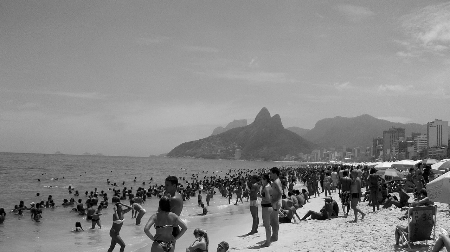

In [8]:
imgprocesser.show_image()

### Transformed image

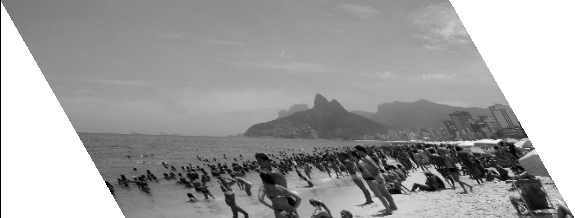

In [9]:
imgprocesser.update()